In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import torch
from   torchvision import transforms
from   torch.utils.data import DataLoader
from   torchvision.utils import save_image
from   torchvision.datasets import MNIST

import matplotlib
import matplotlib.pyplot as plt
from   matplotlib.offsetbox import OffsetImage, AnnotationBbox

from   data import MnistConfig, MnistDataset
from   data.mnist.dataset import MnistTestDataset
from   models import VAE
import plotutils

/Users/gwg/local/dmcm


In [2]:
cfg = MnistConfig()
dataset = MnistDataset(cfg)

cfg.D_EMBEDDINGS = 2
state = torch.load('experiments/vae/mnist/model.pt')
model = VAE(cfg)
model.load_state_dict(state)

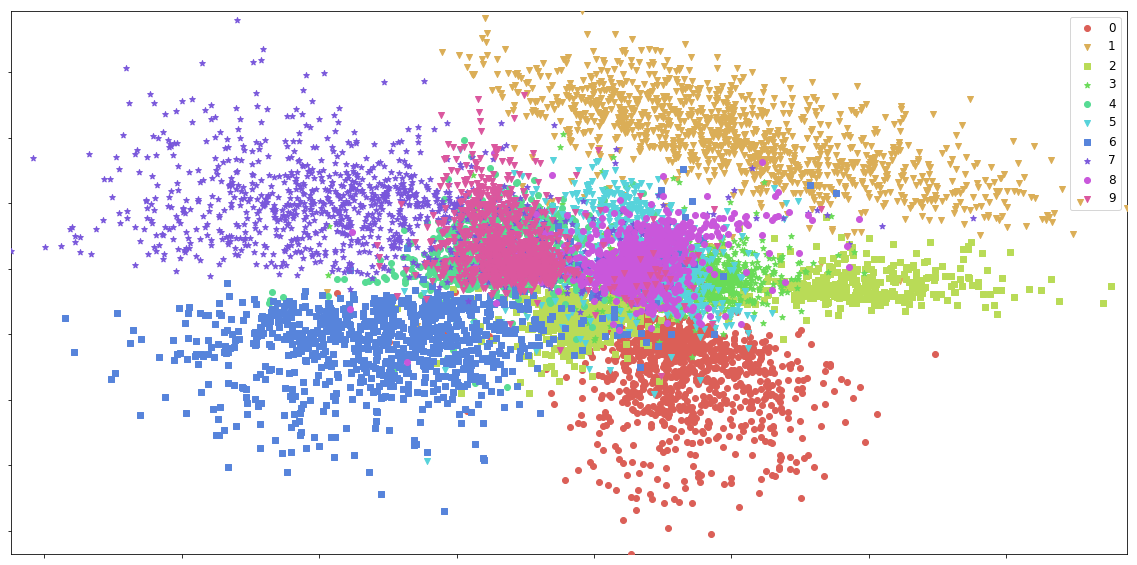

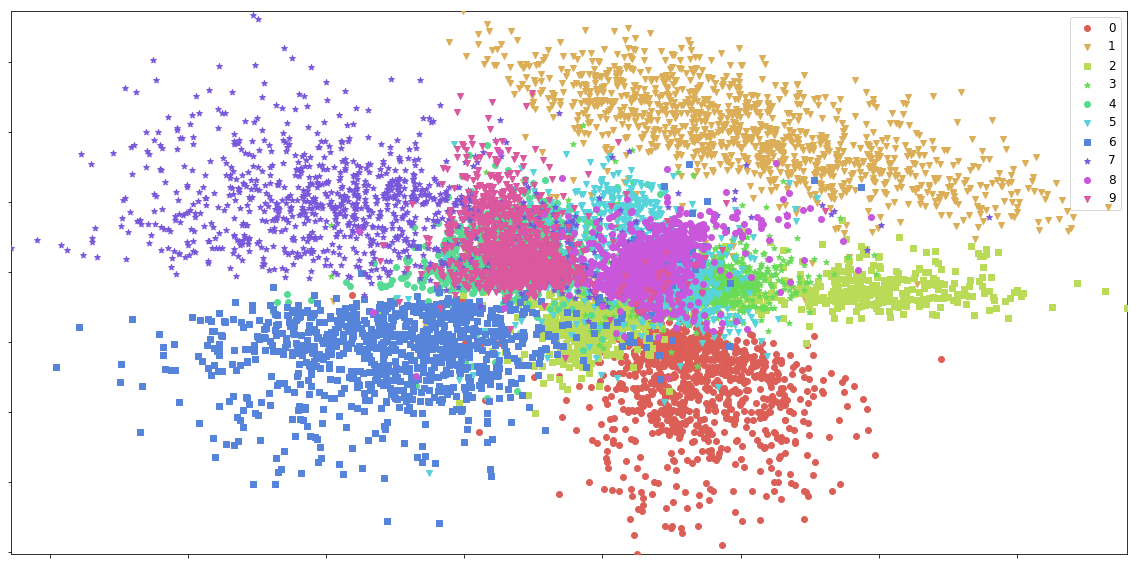

In [4]:
train_set = MnistDataset(cfg)
test_set  = MnistTestDataset(cfg)
dataset   = test_set


def filter_(dataset, classes):
    count = 0
    for image, label in zip(dataset.images, dataset.labels):
        if int(label.item()) in classes:
            count += 1

    new_images = torch.Tensor(count, 28, 28)
    new_labels = torch.Tensor(count)
    
    j = 0
    for image, label in zip(dataset.images, dataset.labels):
        if int(label.item()) in classes:
            new_images[j] = image
            new_labels[j] = int(label)
            j += 1
            
    return new_images, new_labels
            
# new_images, new_labels = filter_(dataset, [3, 8])
# dataset.images = new_images
# dataset.labels = new_labels.numpy()

_, x_emb, _, Z = model.forward(dataset.images.float() / 255.)
Z = Z.detach().numpy()
x_emb = x_emb.detach().numpy()

plotutils.plot_both_embeddings([Z], dataset=dataset, comp_mode=None)
plotutils.plot_both_embeddings([x_emb], dataset=dataset, comp_mode=None)